#### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch

from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
EastWestAirlines = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
EastWestAirlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [3]:
EastWestAirlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


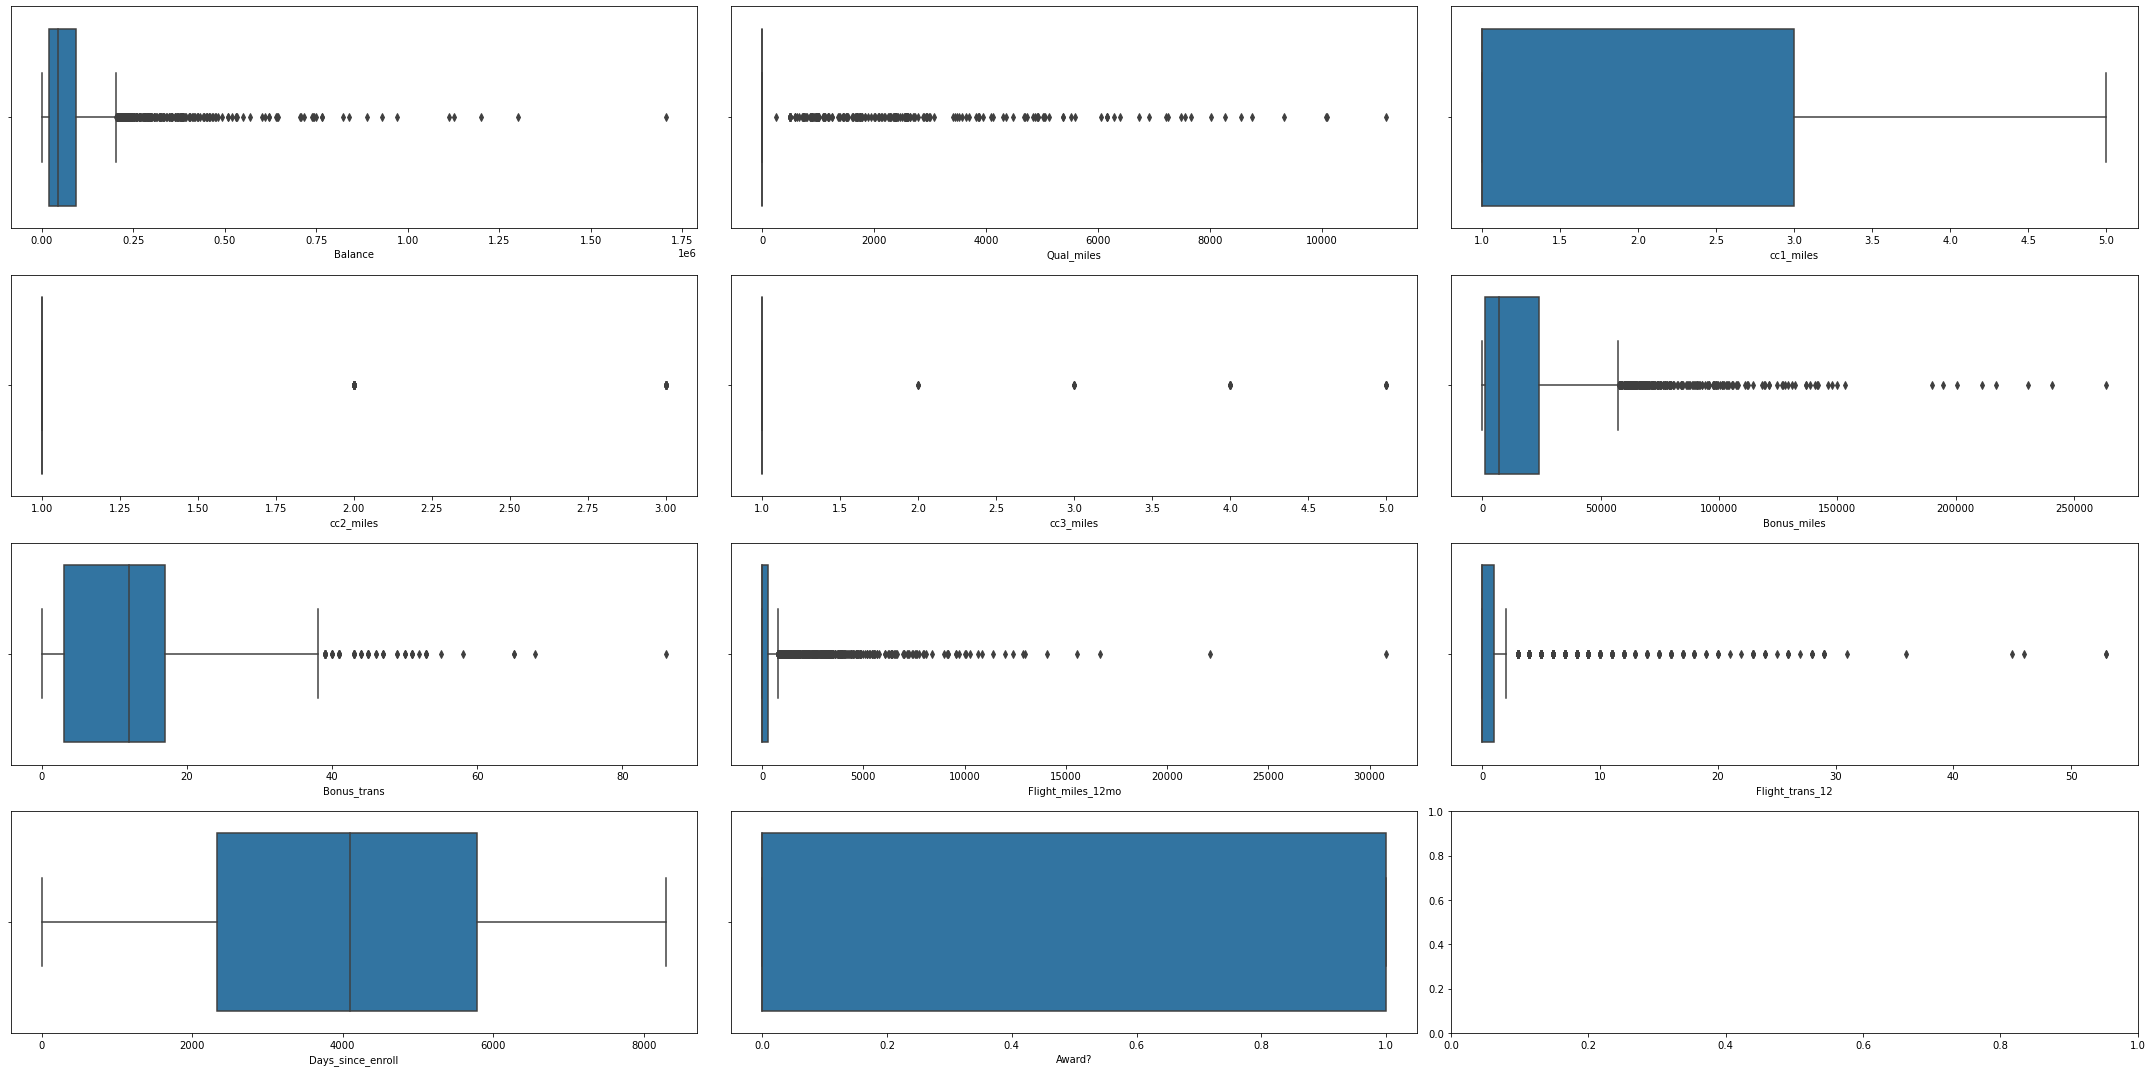

In [4]:
#Checking for outliers

fig, ax = plt.subplots(4, 3, figsize=(30,15))
sns.boxplot(EastWestAirlines.Balance, ax=ax[0,0])
sns.boxplot(EastWestAirlines.Qual_miles, ax=ax[0,1])
sns.boxplot(EastWestAirlines.cc1_miles, ax=ax[0,2])
sns.boxplot(EastWestAirlines.cc2_miles, ax=ax[1,0])
sns.boxplot(EastWestAirlines.cc3_miles, ax=ax[1,1])
sns.boxplot(EastWestAirlines.Bonus_miles, ax=ax[1,2])
sns.boxplot(EastWestAirlines.Bonus_trans, ax=ax[2,0])
sns.boxplot(EastWestAirlines.Flight_miles_12mo, ax=ax[2,1])
sns.boxplot(EastWestAirlines. Flight_trans_12, ax=ax[2,2])
sns.boxplot(EastWestAirlines.Days_since_enroll, ax=ax[3,0])
sns.boxplot(EastWestAirlines["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

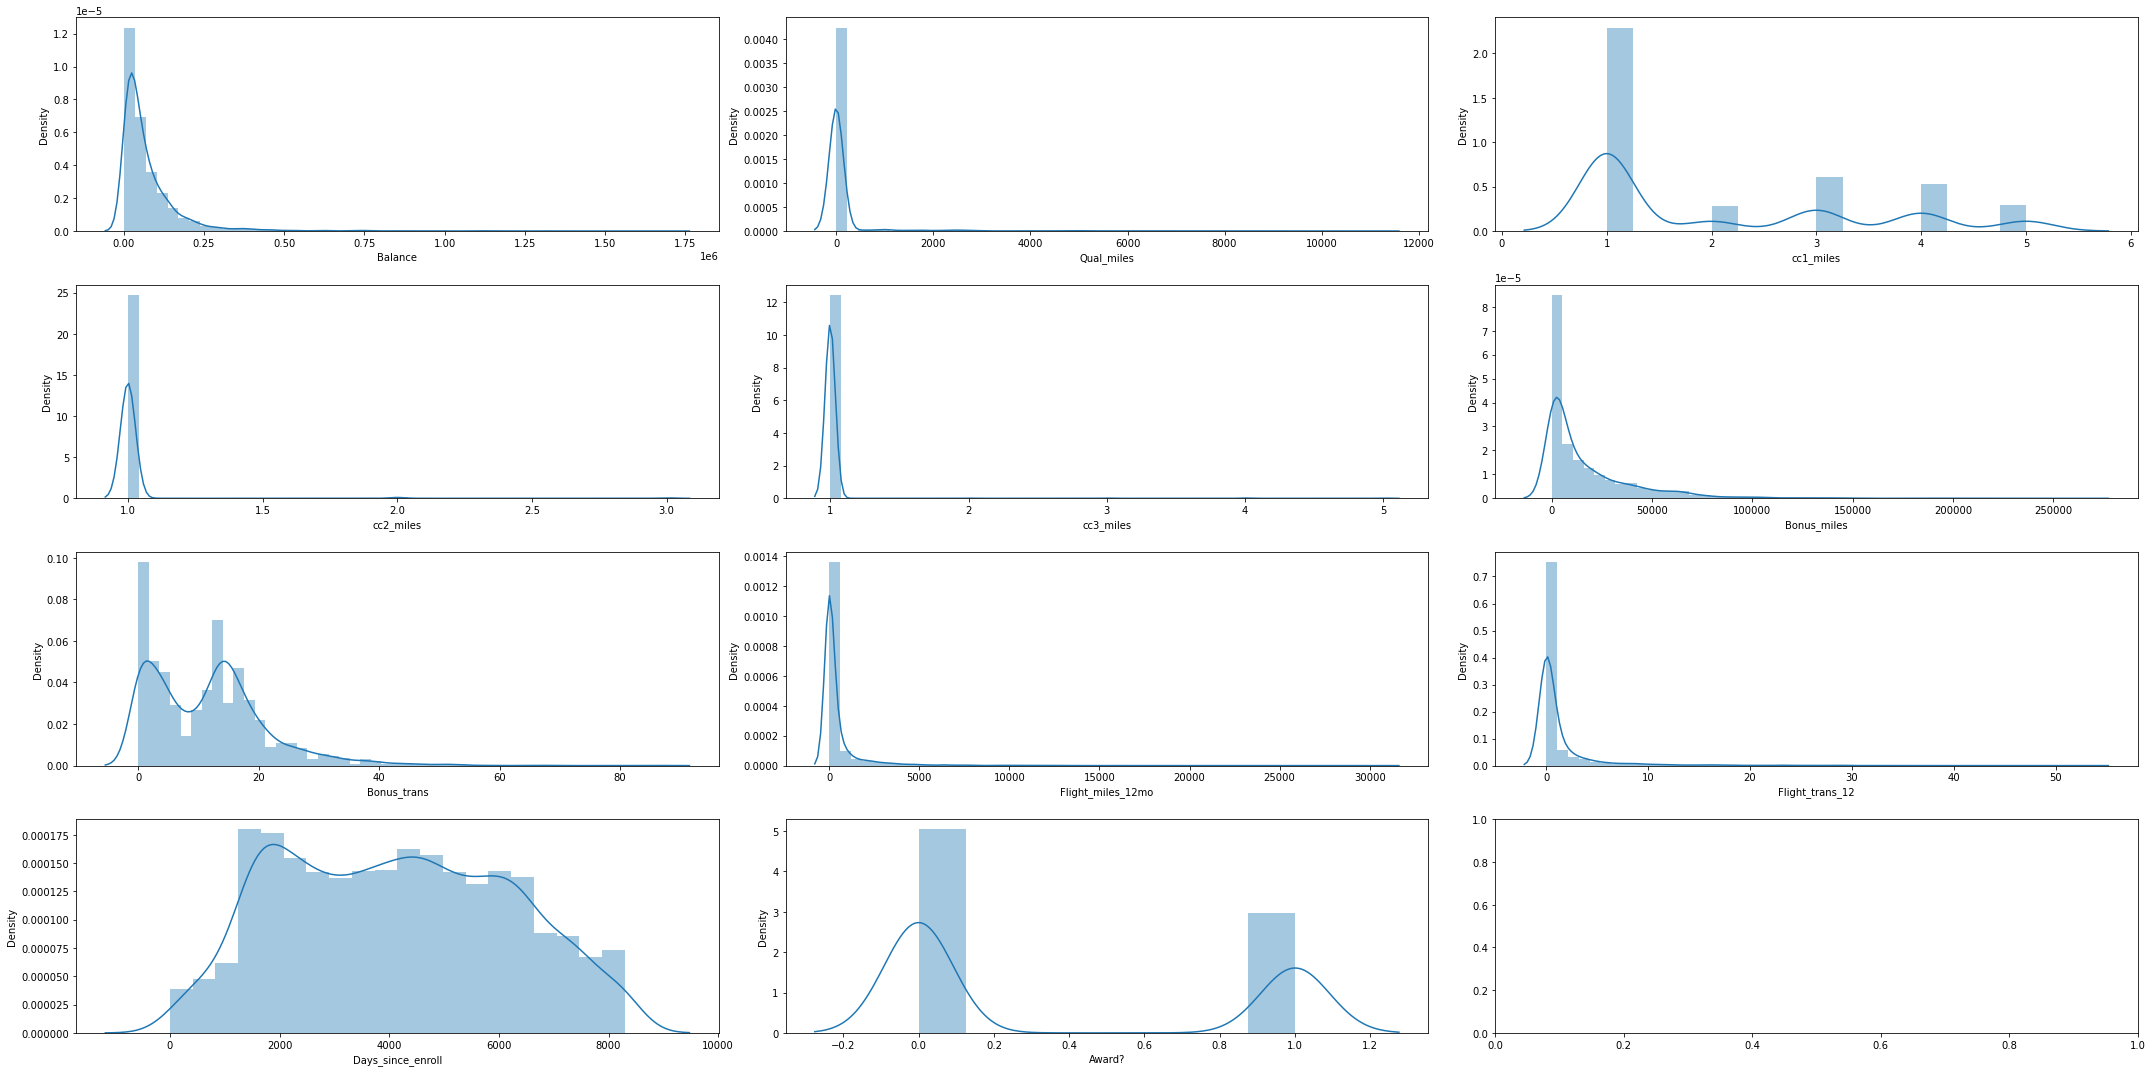

In [5]:
#Checking for normal distribution using distplot

fig, ax = plt.subplots(4, 3, figsize=(30,15))
sns.distplot(EastWestAirlines.Balance, ax=ax[0,0])
sns.distplot(EastWestAirlines.Qual_miles, ax=ax[0,1])
sns.distplot(EastWestAirlines.cc1_miles, ax=ax[0,2])
sns.distplot(EastWestAirlines.cc2_miles, ax=ax[1,0])
sns.distplot(EastWestAirlines.cc3_miles, ax=ax[1,1])
sns.distplot(EastWestAirlines.Bonus_miles, ax=ax[1,2])
sns.distplot(EastWestAirlines.Bonus_trans, ax=ax[2,0])
sns.distplot(EastWestAirlines.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(EastWestAirlines. Flight_trans_12, ax=ax[2,2])
sns.distplot(EastWestAirlines.Days_since_enroll, ax=ax[3,0])
sns.distplot(EastWestAirlines["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

In [6]:
EastWestAirlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
EastWestAirlines.shape

(3999, 12)

In [8]:
EastWestAirlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
EastWestAirlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
sum(EastWestAirlines.duplicated())

0

##### K-Means

In [11]:
#Similar to the sklearn.preprocessing, MinMaxScaler function
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
#Similar to the sklearn.preprocessing, StandardScaler function
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)

In [13]:
x = norm_func(EastWestAirlines.iloc[:, 1:])
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


In [14]:
#Normalization Function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_EastWestAirlines_df = scaler.fit_transform(EastWestAirlines.iloc[:, 1:])

In [15]:
scaled_EastWestAirlines_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [16]:
#How to find optimum number of clusters
#The K-Means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

[43978.0000000004, 35400.65686091362, 30891.520081260198, 27439.509147740115, 24535.19271543374, 21084.699817069682, 19161.068795125357, 17312.536146942144, 16039.394387785456, 14723.300656269628]


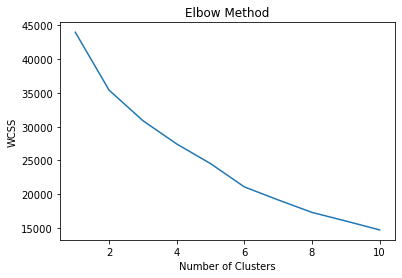

In [17]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
print(wcss)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Build Cluster algorithmn
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state = 0)
clusters_new.fit(x)

KMeans(n_clusters=5, random_state=0)

In [19]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [20]:
#Assign clusters to the dataset
EastWestAirlines['clusterid_k'] = clusters_new.labels_

In [21]:
EastWestAirlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_k
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [22]:
#These are Standardized Values.
clusters_new.cluster_centers_

array([[-0.29988217, -0.13207359, -0.60972832,  0.03377729, -0.06072139,
        -0.51601675, -0.4874995 , -0.18609397, -0.19853259, -0.20346235,
        -0.35089574],
       [ 1.15752771,  0.40666264,  0.11981451,  0.17820965, -0.06275873,
         0.65269158,  1.73154107,  3.73213336,  3.99407527,  0.26851628,
         0.89527364],
       [ 0.43286273, -0.10857791,  1.19061135, -0.08212954, -0.05464165,
         0.91104978,  0.74590719, -0.08179182, -0.08950832,  0.37462671,
         0.57199757],
       [ 0.45704649,  6.73025029, -0.04322321, -0.0982296 , -0.06275873,
         0.0637088 ,  0.06534987,  0.35964882,  0.39419749, -0.07121453,
         0.38726954],
       [ 0.63963927, -0.08442237,  1.0219566 , -0.0982296 , 15.64434291,
         3.17929372,  1.71439935,  0.03328853,  0.05968793,  0.23984262,
         0.33748514]])

In [23]:
EastWestAirlines.groupby('clusterid_k').agg(['mean']).reset_index

<bound method DataFrame.reset_index of                      ID#        Balance   Qual_miles cc1_miles cc2_miles  \
                    mean           mean         mean      mean      mean   
clusterid_k                                                                
0            2240.128327   43438.468415    41.883989  1.222090  1.019468   
1            1757.802721  190251.952381   458.734694  2.224490  1.040816   
2            1596.501191  117283.428118    60.254964  3.700556  1.002383   
3            2057.295082  119660.491803  5351.065574  2.000000  1.000000   
4            1664.866667  138061.400000    78.800000  3.466667  1.000000   

            cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                 mean          mean        mean              mean   
clusterid_k                                                         
0            1.000397   4696.888359    6.930473        199.267382   
1            1.000000  32907.979592   28.231293       5685.823129   
2      

In [24]:
EastWestAirlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_k
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [25]:
EastWestAirlines['clusterid_k'] = EastWestAirlines['clusterid_k'].replace(0, 'Cluster1')
EastWestAirlines['clusterid_k'] = EastWestAirlines['clusterid_k'].replace(1, 'Cluster2')
EastWestAirlines['clusterid_k'] = EastWestAirlines['clusterid_k'].replace(2, 'Cluster3')
EastWestAirlines['clusterid_k'] = EastWestAirlines['clusterid_k'].replace(3, 'Cluster4')
EastWestAirlines['clusterid_k'] = EastWestAirlines['clusterid_k'].replace(4, 'Cluster5')
EastWestAirlines['clusterid_k'] = EastWestAirlines['clusterid_k'].replace(5, 'Cluster6')
EastWestAirlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_k
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,Cluster1


In [26]:
EastWestAirlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'clusterid_k'],
      dtype='object')

In [27]:
EastWestAirlines.groupby('clusterid_k').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid_k,,,,,,,,,,,,
Cluster1,2240.128327,43438.468415,41.883989,1.222090,1.019468,1.000397,4696.888359,6.930473,199.267382,0.620183,3699.023441,0.200636
Cluster2,1757.802721,190251.952381,458.734694,2.224490,1.040816,1.000000,32907.979592,28.231293,5685.823129,16.523810,4673.081633,0.802721
Cluster3,1596.501191,117283.428118,60.254964,3.700556,1.002383,1.001589,39201.023828,18.772836,346.313741,1.035743,4893.776807,0.648133
Cluster4,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
Cluster5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [28]:
EastWestAirlines['clusterid_k'].value_counts()

Cluster1    2517
Cluster3    1259
Cluster2     147
Cluster4      61
Cluster5      15
Name: clusterid_k, dtype: int64

In [29]:
#Silhouette Score
X = metrics.silhouette_score(x, clusters_new.labels_)
X

0.31819537664379094

##### Hierarchical Clustering

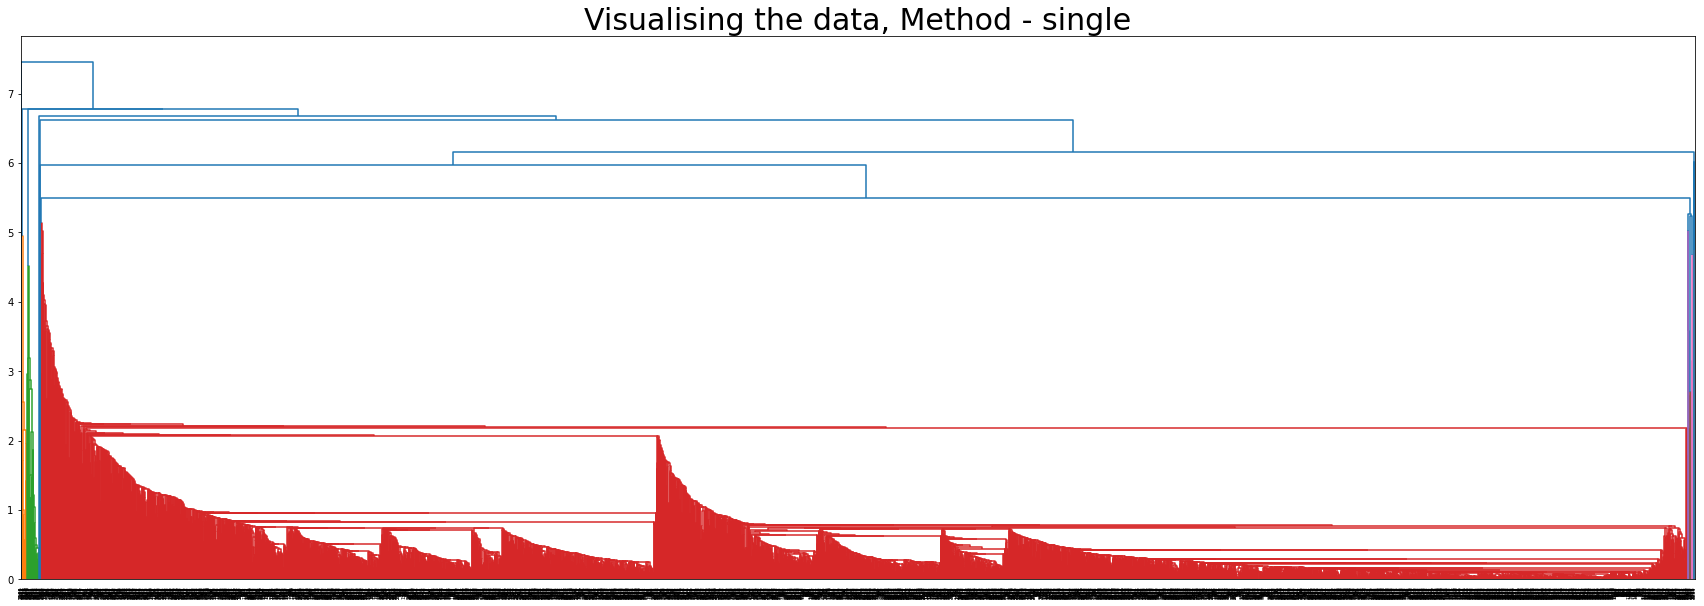

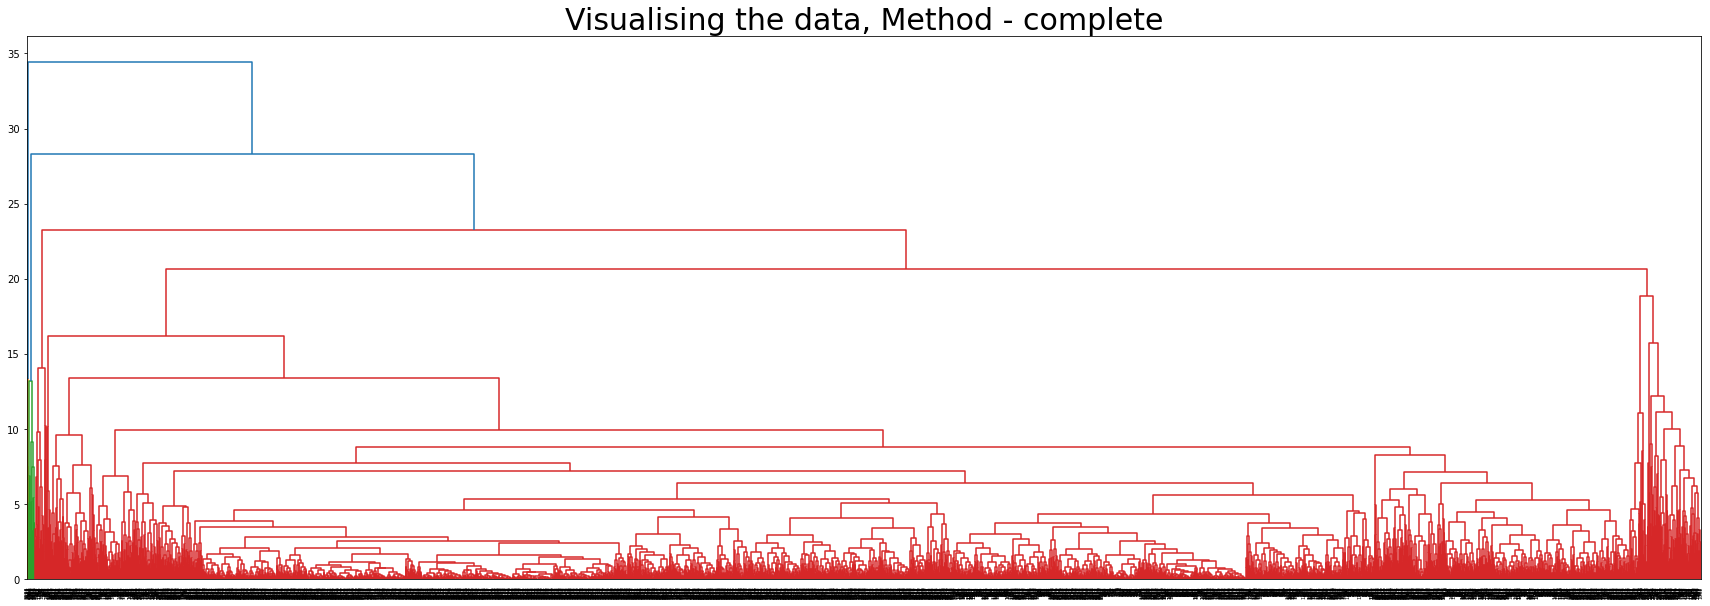

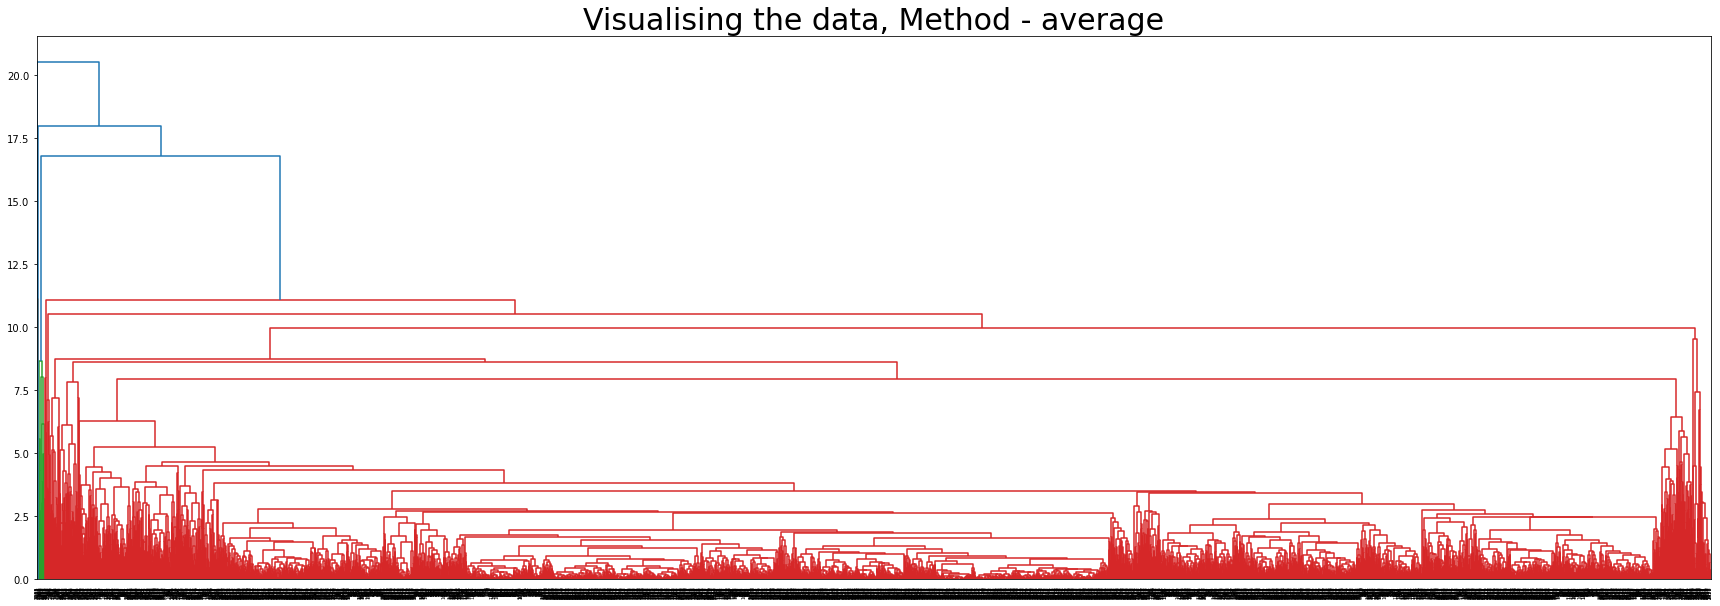

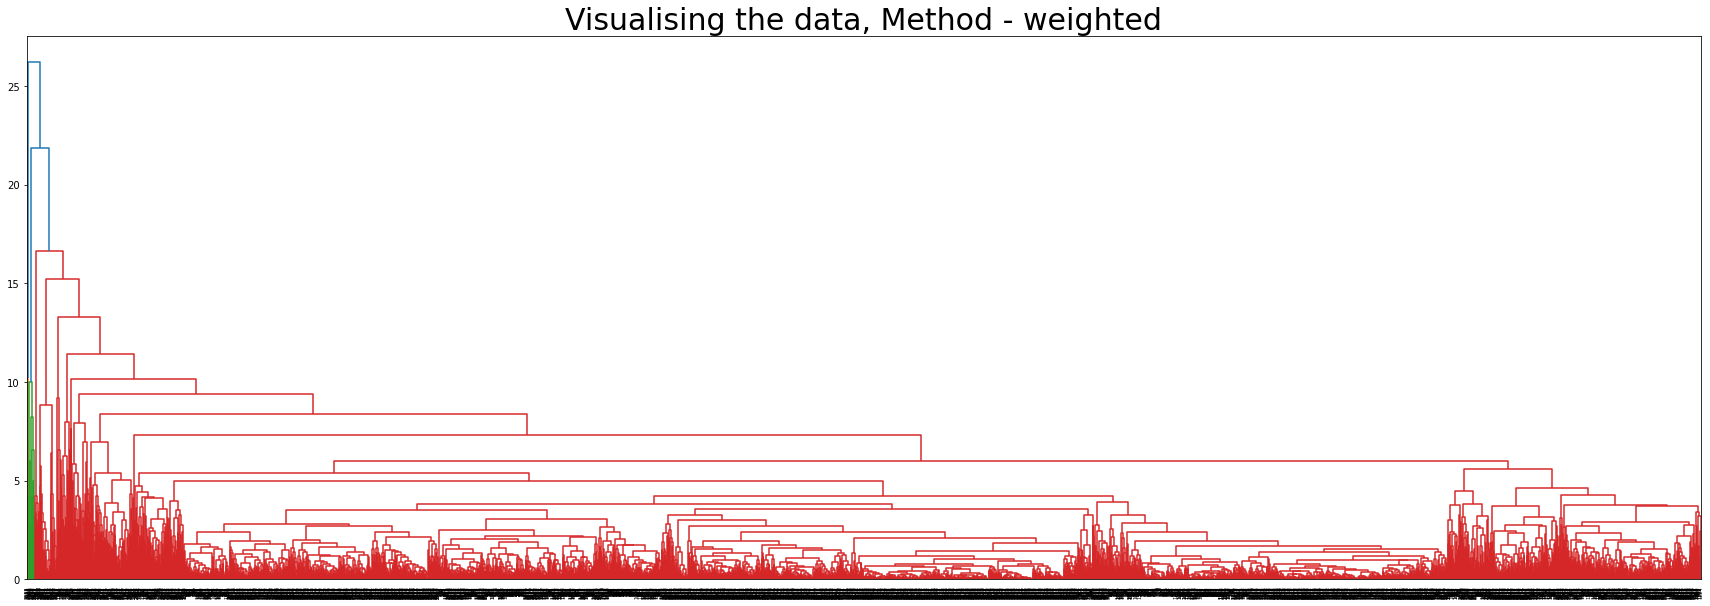

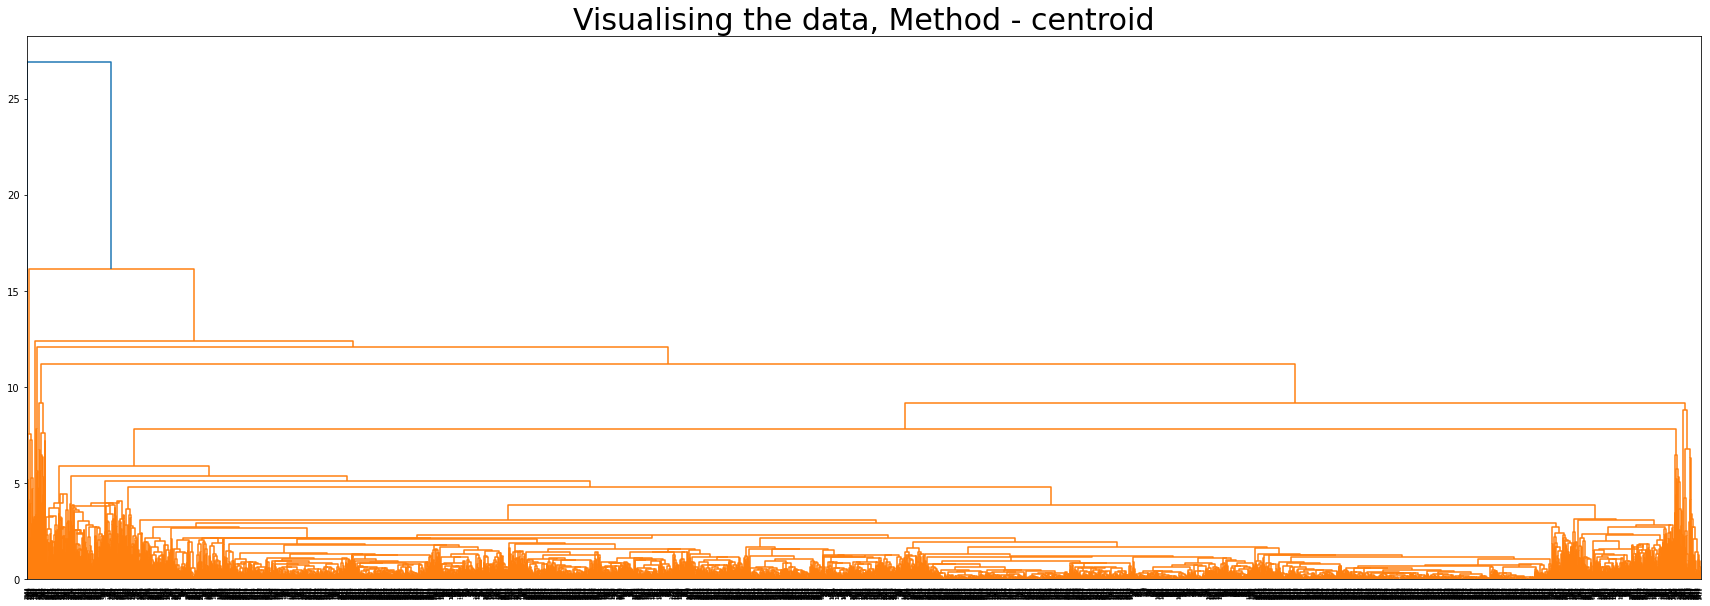

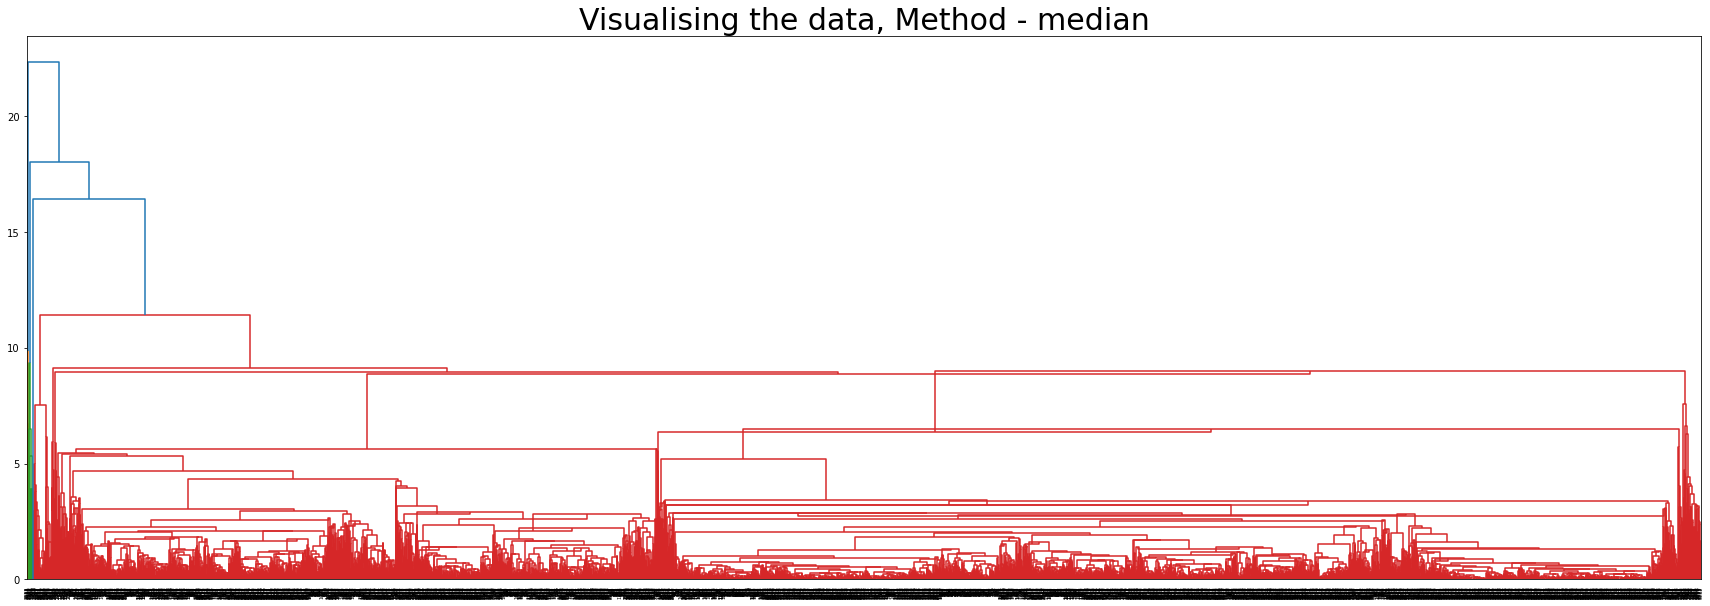

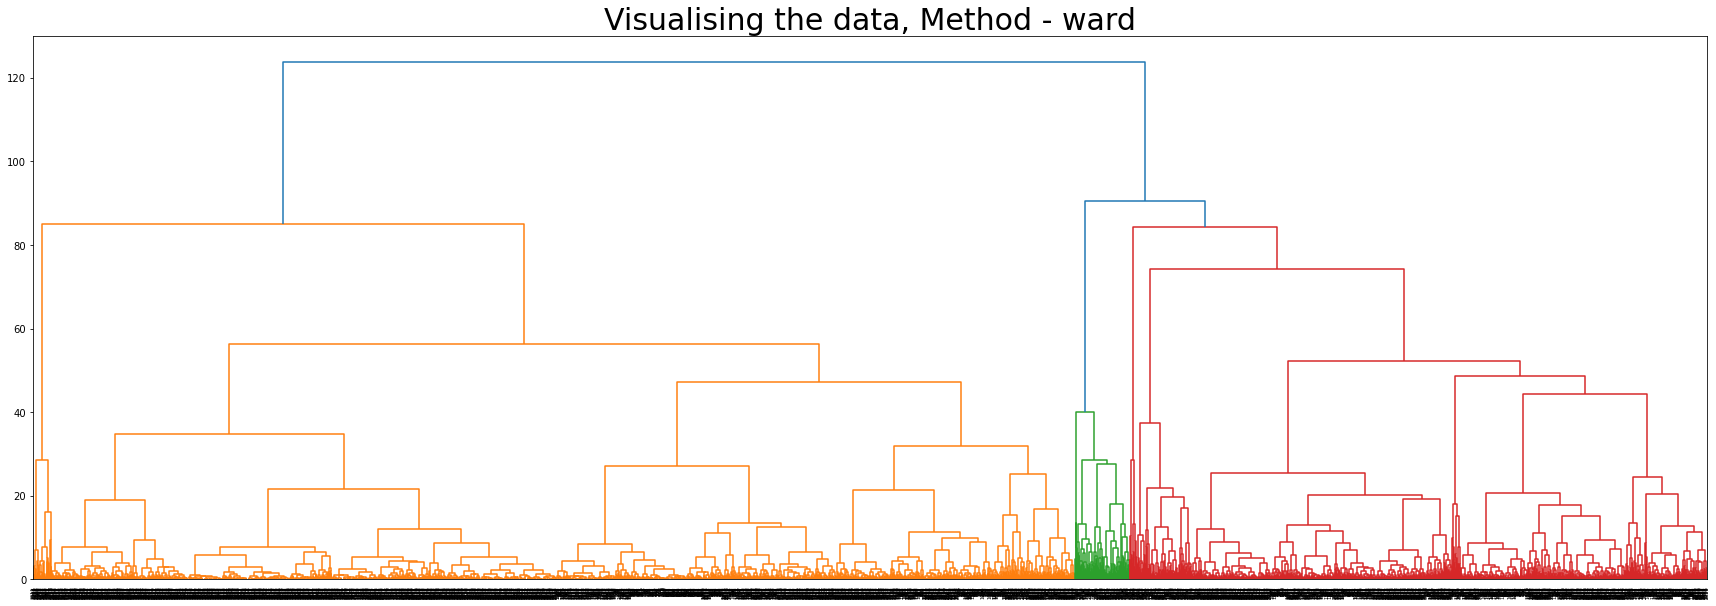

In [30]:
#Create Dendrogram
for method in ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']:
    plt.figure(figsize = (30, 10))
    
    dict = {'fontsize' : 30, 'fontweight' : 12, 'color' : 'black'}
    
    plt.title('Visualising the data, Method - {}'.format(method), fontdict = dict)
    dendrogram = sch.dendrogram(sch.linkage(x, method = method, optimal_ordering = False))

In [31]:
#Create Clusters
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=3)

In [32]:
#Save Clusters for chart
y_hc = hc.fit_predict(x)
y_hc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [33]:
Clusters = pd.DataFrame(y_hc, columns = ['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,0
3995,0
3996,1
3997,0


In [34]:
Clusters.value_counts()

Clusters
0           2489
1           1380
2            130
dtype: int64

In [35]:
y_hc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
EastWestAirlines['clusterid_h'] = y_hc
EastWestAirlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_k,clusterid_h
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster3,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,Cluster1,0


In [37]:
EastWestAirlines['clusterid_h'] = EastWestAirlines['clusterid_h'].replace(0, 'Cluster 1')
EastWestAirlines['clusterid_h'] = EastWestAirlines['clusterid_h'].replace(1, 'Cluster 2')
EastWestAirlines['clusterid_h'] = EastWestAirlines['clusterid_h'].replace(2, 'Cluster 3')
EastWestAirlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_k,clusterid_h
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster1,Cluster 1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster1,Cluster 1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster1,Cluster 1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster1,Cluster 1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster3,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster1,Cluster 1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster1,Cluster 1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster3,Cluster 2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,Cluster1,Cluster 1


In [38]:
EastWestAirlines.groupby('clusterid_h').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid_h,,,,,,,,,,,,
Cluster 1,2198.450783,46718.863399,9.274407,1.242266,1.023303,1.000000,5037.792688,7.091201,221.167135,0.700281,3772.785858,0.188027
Cluster 2,1707.093478,116314.450725,363.839130,3.498551,1.000000,1.035507,37150.356522,18.066667,377.000000,1.150000,4696.888406,0.663043
Cluster 3,1765.615385,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846


In [39]:
EastWestAirlines['clusterid_h'].value_counts()

Cluster 1    2489
Cluster 2    1380
Cluster 3     130
Name: clusterid_h, dtype: int64

In [40]:
#Silhouette Score
X = metrics.silhouette_score(x, y_hc)
X

0.2940432062008628

##### DBSCAN

In [41]:
data = EastWestAirlines[['ID#','Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [42]:
array = data.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [43]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)

In [44]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [45]:
dbscan = DBSCAN(eps = 1.2, min_samples = 8)
dbscan.fit(X)

DBSCAN(eps=1.2, min_samples=8)

In [46]:
#Noisy samples are given the label -1
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
data['cluster'] = pd.DataFrame(dbscan.labels_)
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [48]:
data['cluster'].value_counts()

 0    2332
 1    1111
-1     528
 3      11
 4      11
 2       6
Name: cluster, dtype: int64

In [49]:
#To find the percentage of noise points
(len(data[data['cluster'] == -1])/len(data))*100

13.203300825206302

In [50]:
#Silhouette Score
X = metrics.silhouette_score(X, dbscan.labels_)
X

0.1397890691619345

In [51]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps = eps, min_samples = min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
    plt.title('DBSCAN')

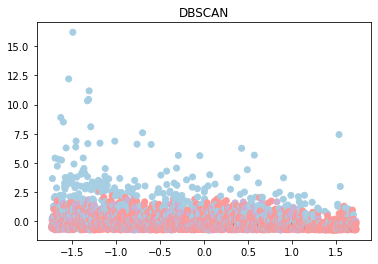

In [52]:
dbscan(array, 1.0, 8)

##### Conclusion:

- Three clusters are good to classify passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.
- From different clustering methods, it is evident that the Hierarchical Clustering has the highest silhouette score.
- Higher the silhouette score, more far are the clusters seperated from each other.